In [69]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [41]:
data_train = pd.read_csv('Data/LoR_DT_RF/train.csv')
data_test = pd.read_csv('Data/LoR_DT_RF/test.csv')

In [42]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


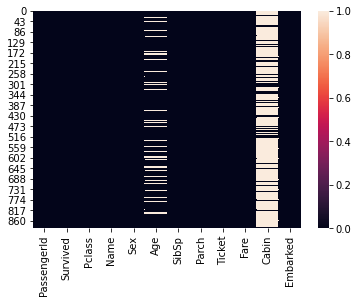

In [43]:
sns.heatmap(data_train.isnull())

In [44]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
data_train.drop('Cabin',axis=1,inplace=True)

In [46]:
mean_age = data_train.Age.mean()

In [47]:
data_train.Age.fillna(mean_age,inplace=True)

In [48]:
data_train.dropna(how='any',inplace=True)

In [49]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [50]:
features = ['Name','Sex','Ticket','Embarked']

In [51]:
for feature in features:
    dummies = pd.get_dummies(data_train[[feature]])
    res = pd.concat([data_train, dummies], axis=1)
    res = res.drop([feature], axis=1)
    data_train = res

In [55]:
data_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
X,Y = data_train.drop('Survived',axis=1),data_train['Survived']

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [88]:
class_list =[]

In [89]:
class_list.append(LogisticRegression())
class_list.append(DecisionTreeClassifier())
class_list.append(RandomForestClassifier(n_estimators=20))

In [94]:
for reg in class_list:
    reg.fit(X_train, Y_train)
    Y_pred = reg.predict(X_test)
    print(str(reg.__class__)+" : "+str(accuracy_score(Y_test,Y_pred)))


<class 'sklearn.linear_model.logistic.LogisticRegression'> : 0.8163265306122449
<class 'sklearn.tree.tree.DecisionTreeClassifier'> : 0.7721088435374149
<class 'sklearn.ensemble.forest.RandomForestClassifier'> : 0.8061224489795918


In [96]:
useful_col = X_train.columns

In [97]:
for feature in features:
    dummies = pd.get_dummies(data_test[[feature]])
    res = pd.concat([data_test, dummies], axis=1)
    res = res.drop([feature], axis=1)
    data_test = res